
# Prediction of Waiter tips
Gohar Khachatryan

Tumo labs Alt pace challange


### Loading packages

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Loading the dataset

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Visualizing the relationships between different features using scatter and pie functions

Now we see how the 'tip' is affected by the size of the meal , the day , sex of the customer and the time of the meal

In [ ]:
px.pie(df, values='tip', names='day', title='Day')

In [ ]:
px.pie(df , values = 'tip' ,names='sex', title="Gender")

In [ ]:
px.pie(df, values='tip', names='smoker', title='Smoker')

In [ ]:
px.pie(df, values='tip',names='time', title="Time")

<Axes: xlabel='total_bill', ylabel='tip'>

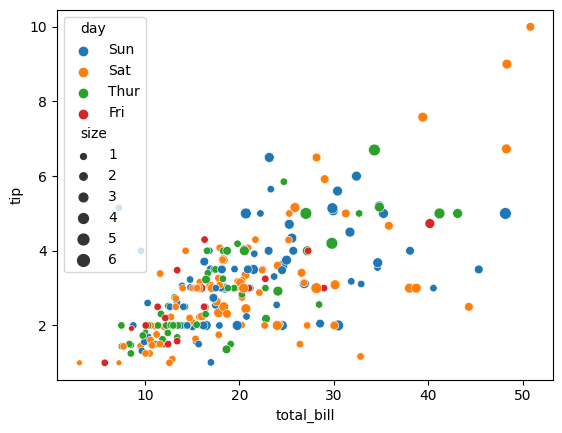

In [ ]:
sns.scatterplot(data = df, x='total_bill', y='tip',size='size',hue='day')

<Axes: xlabel='total_bill', ylabel='tip'>

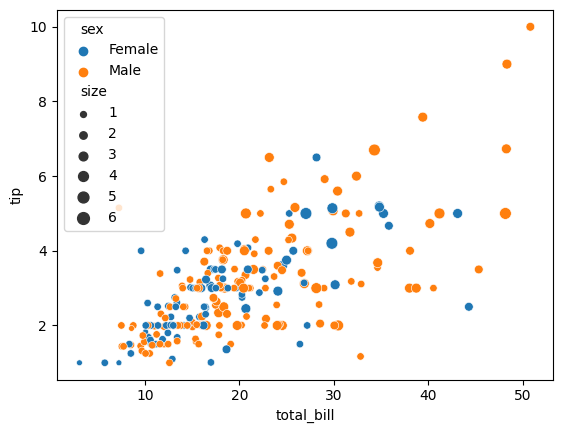

In [ ]:
sns.scatterplot(data = df, x='total_bill', y='tip',size='size',hue='sex')

<Axes: xlabel='total_bill', ylabel='tip'>

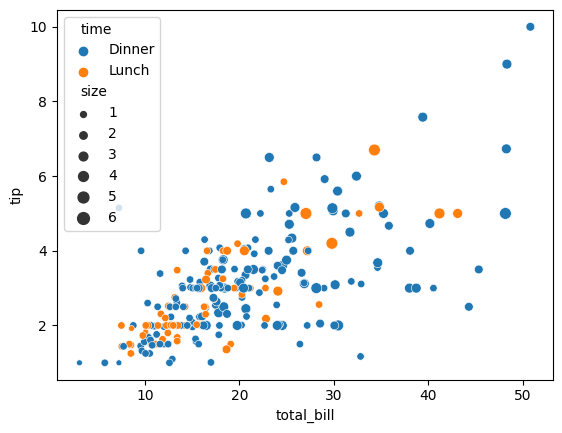

In [ ]:
sns.scatterplot(data = df, x='total_bill', y='tip',size='size',hue='time')

### Data proccesing

In [6]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Adding new perecentTip column to our data

In [8]:
df["percentTip"] = df["tip"] / df["total_bill"] * 100

Changing categorical data to a numerical

In [9]:
df["sex"] = df["sex"].map({"Female": 0, "Male": 1})
df["smoker"] = df["smoker"].map({"No": 0, "Yes": 1})
df["day"] = df["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
df["time"] = df["time"].map({"Lunch": 0, "Dinner": 1})
df.head()

,total_bill,tip,sex,smoker,day,time,size,percentTip
0,16.99,1.01,0,0,3,1,2,5.944673
1,10.34,1.66,1,0,3,1,3,16.054159
2,21.01,3.50,1,0,3,1,3,16.658734
3,23.68,3.31,1,0,3,1,2,13.978041
4,24.59,3.61,0,0,3,1,4,14.680765


### Splitting data to train and test

In [10]:
X = df.drop('tip', axis=1)
y = df['tip']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LinearRegression

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.806166331084734

In [21]:
y_pred = lr.predict(X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - y_pred)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - y_pred) ** 2))

Mean absolute error: 0.35
Residual sum of squares (MSE): 0.24


In [ ]:
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression


X = df.total_bill.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, df.tip)

x_range = np.linspace(X.min(), X.max(), 100)
x_range
y_range = model.predict(x_range.reshape(-1, 1))
y_range
fig = px.scatter(df, x='total_bill', y='tip', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()

### Random forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#display regression coefficients and R-squared value of model
print(regr.score(X_test, y_test))

0.8610022111960453


In [ ]:
regr_score = {}

for depth in range(1,20):
    rf = RandomForestRegressor(max_depth=depth, random_state=42)
    rf.fit(X_train,y_train)
    y_training_pred = rf.predict(X_train)

    regr_score[depth] = rf.score(X_test, y_test)

# Extract keys and values from the dictionary
keys = list(regr_score.keys())
values = list(regr_score.values())


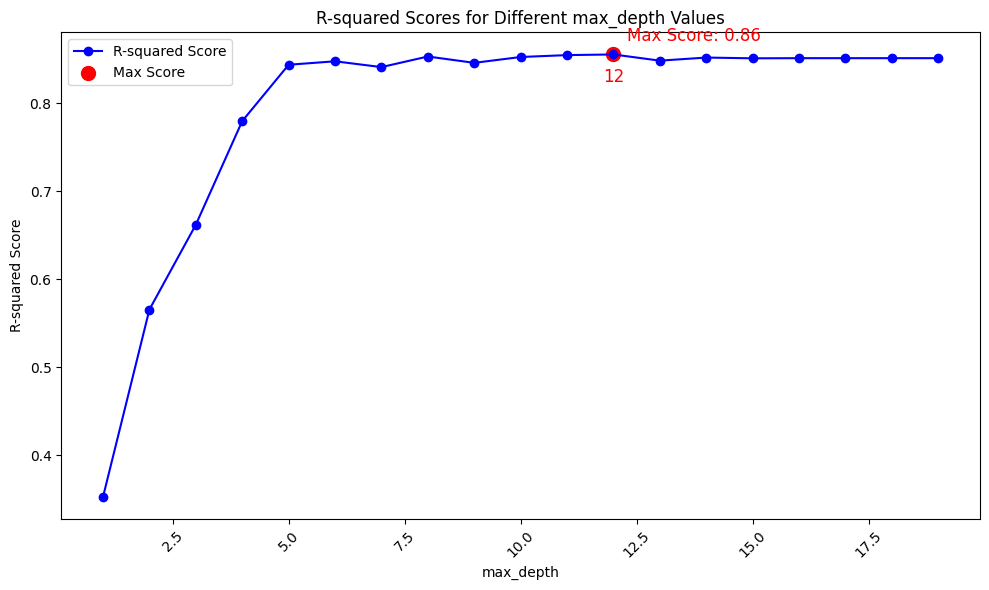

In [ ]:
# Find the key corresponding to the maximum value
max_score_key = max(regr_score, key=regr_score.get)
max_score_value = regr_score[max_score_key]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(keys, values, marker='o', color='blue', label='R-squared Score')
plt.xlabel('max_depth')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores for Different max_depth Values')
plt.xticks(rotation=45)

# Annotate the maximum score value and key
plt.annotate(f'Max Score: {max_score_value:.2f}', xy=(max_score_key, max_score_value),
             xytext=(10, 10), textcoords='offset points', fontsize=12, color='red')

# Highlight the point with maximum score
plt.scatter(max_score_key, max_score_value, color='red', s=100, label='Max Score')

# Annotate the key for the maximum score point
plt.annotate(max_score_key, xy=(max_score_key, max_score_value),
             xytext=(0, -20), textcoords='offset points', fontsize=12, color='red', ha='center')

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=12)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=12)

In [ ]:
regr.score(X_test, y_test)

0.86390588039663